In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, cross_val_predict, RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, silhouette_samples, silhouette_score
from sklearn.impute import KNNImputer
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from statistics import mean
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
import matplotlib.cm as cm
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


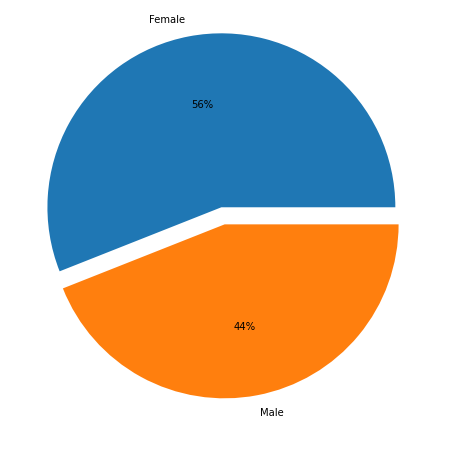

In [7]:
# Data Exploring

value1 = df['Gender'].value_counts()
fig = plt.figure(figsize = (12,8))
plt.pie(value1, labels = value1.index, autopct = '%.f%%', explode = (0.1, 0));

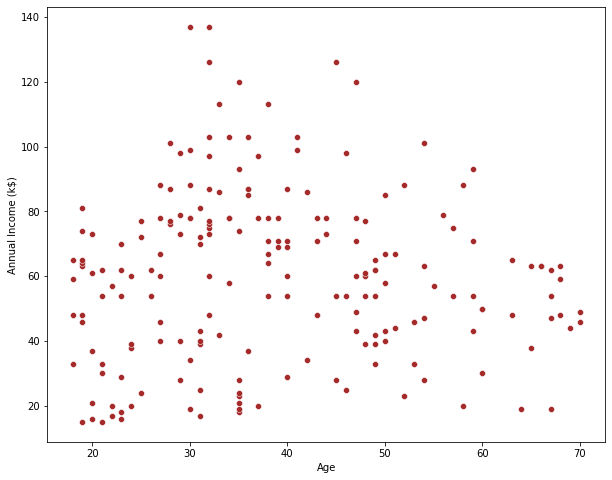

In [8]:
fig = plt.figure(figsize = (10,8))
sns.scatterplot(data = df, x = 'Age', y = 'Annual Income (k$)', color = 'brown');

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

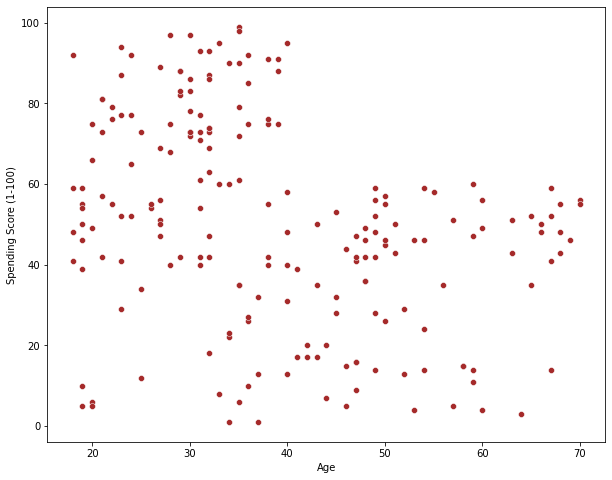

In [9]:
fig = plt.figure(figsize = (10,8))
sns.scatterplot(data = df, x = 'Age', y = 'Spending Score (1-100)', color = 'brown')

<Figure size 720x576 with 0 Axes>

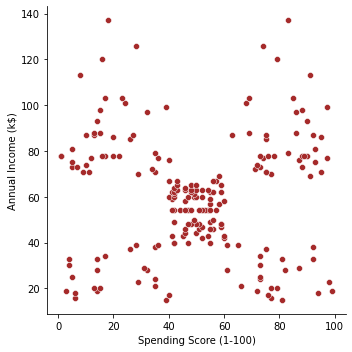

In [10]:
fig = plt.figure(figsize = (10,8))
sns.relplot(data = df, x = 'Spending Score (1-100)', y = 'Annual Income (k$)', color = 'brown');

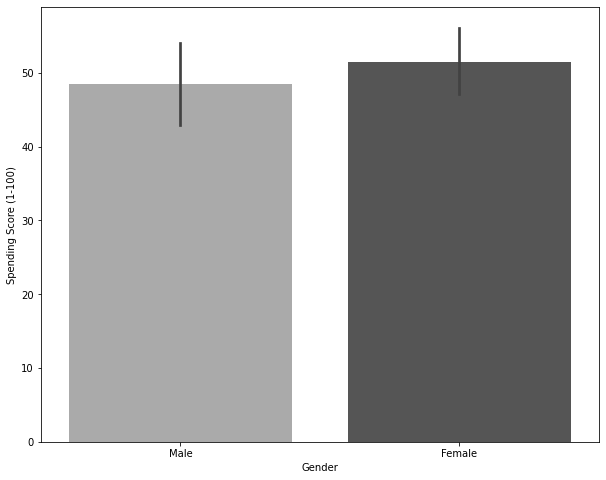

In [11]:
fig = plt.figure(figsize = (10,8))
sns.barplot(data = df, x = 'Gender', y = 'Spending Score (1-100)', palette = 'binary');

<AxesSubplot:xlabel='Age', ylabel='Count'>

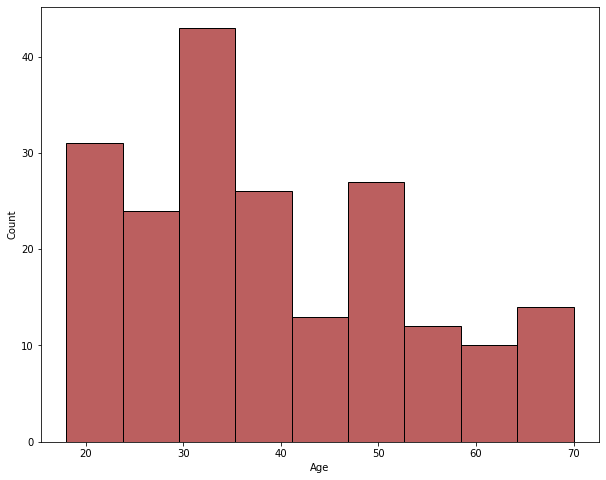

In [12]:
fig = plt.figure(figsize = (10,8))
sns.histplot(df['Age'], color = 'brown')

#### Label Encoder

In [13]:
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [14]:
df = df.drop('CustomerID', axis = 1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [15]:
age = df.iloc[:,[1,3]].values
income = df.iloc[:,[2,3]].values
age

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [16]:
income

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### KMeans Clustering

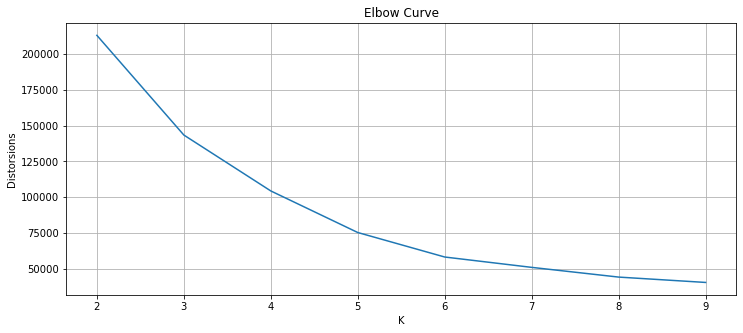

In [17]:
distorsions = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize = (12,5))
plt.plot(range(2,10), distorsions)
plt.title('Elbow Curve')
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.grid(True)
plt.show()

In [18]:
def distorsion(data):
    distorsions = []
    for k in range(2,20,2):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        distorsions.append(kmeans.inertia_)
        
    fig = plt.figure(figsize = (12,5))
    plt.plot(range(2,20,2), distorsions)
    plt.title('Elbow Curve')
    plt.xlabel('K')
    plt.ylabel('Distorsions')
    plt.grid(True)
    plt.show()
    
def clusters(data):
    for n_clusters in range(2,20,2):
        cluster1 = KMeans(n_clusters = n_clusters, random_state = 10)
        cluster_labels = cluster1.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        print('For n_clusters =',n_clusters, 'The Average Silhouette Score is =', silhouette_avg)

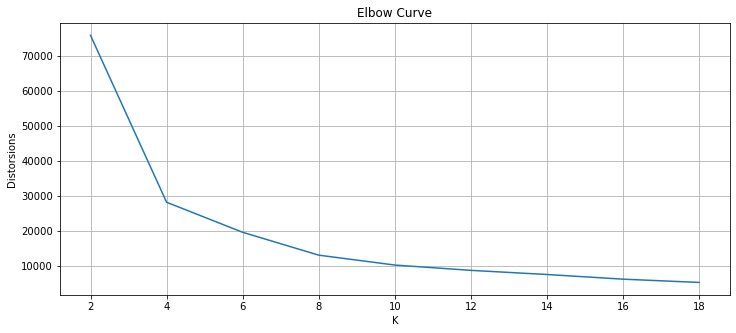

In [19]:
distorsion(age)

In [20]:
clusters(age)

For n_clusters = 2 The Average Silhouette Score is = 0.4692341232501655
For n_clusters = 4 The Average Silhouette Score is = 0.49973941540141753
For n_clusters = 6 The Average Silhouette Score is = 0.4376185638584134
For n_clusters = 8 The Average Silhouette Score is = 0.4304921688137185
For n_clusters = 10 The Average Silhouette Score is = 0.40542078190094527
For n_clusters = 12 The Average Silhouette Score is = 0.40389092365398627
For n_clusters = 14 The Average Silhouette Score is = 0.4094048075198883
For n_clusters = 16 The Average Silhouette Score is = 0.39397363580757205
For n_clusters = 18 The Average Silhouette Score is = 0.4085372361355948


In [21]:
Kmeans_model = KMeans(n_clusters = 6)
Kmeans_age = Kmeans_model.fit(age)
cluster_centroid = Kmeans_model.cluster_centers_
labels = Kmeans_model.labels_
kmeans_score = silhouette_score(age, labels)
kmeans_score

0.446619017091555

In [22]:
results_wpca = list()
names = list()
results_wpca.append(kmeans_score)
names.append('kmeans')

In [23]:
def scatter_plot(x, y, label, xlabel1, ylabel1, title1):
    plt.figure(figsize = (10,5))
    plt.scatter(x, y, c = label, cmap = 'rainbow')
    plt.title(title1)
    plt.xlabel(xlabel1)
    plt.ylabel(ylabel1)
    plt.show()

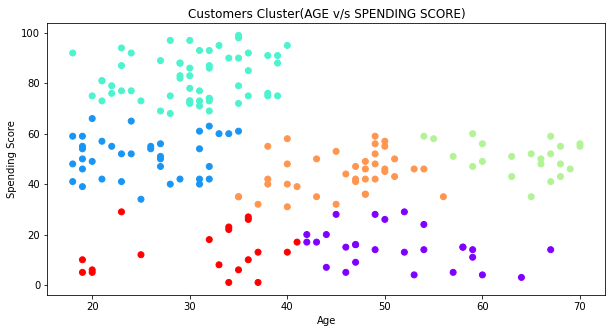

In [24]:
scatter_plot(df['Age'], df['Spending Score (1-100)'], labels, 'Age', 'Spending Score', 'Customers Cluster(AGE v/s SPENDING SCORE)')

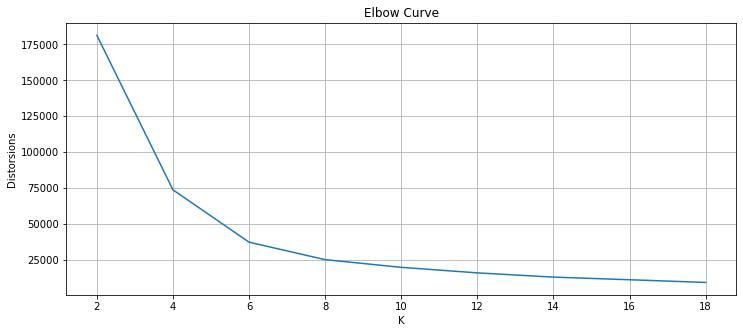

In [25]:
distorsion(income)

In [26]:
clusters(income)

For n_clusters = 2 The Average Silhouette Score is = 0.2968969162503008
For n_clusters = 4 The Average Silhouette Score is = 0.4931963109249047
For n_clusters = 6 The Average Silhouette Score is = 0.5376203956398481
For n_clusters = 8 The Average Silhouette Score is = 0.4572211842776841
For n_clusters = 10 The Average Silhouette Score is = 0.4467356774401869
For n_clusters = 12 The Average Silhouette Score is = 0.4267928147986293
For n_clusters = 14 The Average Silhouette Score is = 0.43623474793328404
For n_clusters = 16 The Average Silhouette Score is = 0.4177588115411932
For n_clusters = 18 The Average Silhouette Score is = 0.43386019711220697


In [27]:
Kmeans_model = KMeans(n_clusters = 6)
y_means = Kmeans_model.fit(income)
cluster_centroid = Kmeans_model.cluster_centers_
labels_income = Kmeans_model.labels_
kmeans_income_score = silhouette_score(income, labels_income)
kmeans_income_score

0.53976103063432

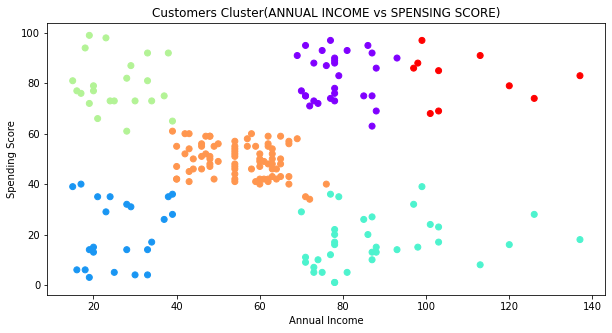

In [28]:
scatter_plot(df['Annual Income (k$)'],df['Spending Score (1-100)'], labels_income, 'Annual Income', 'Spending Score', 'Customers Cluster(ANNUAL INCOME vs SPENSING SCORE)')

#### Agglomerative

In [29]:
def dendogram(data, x):
    plt.figure(figsize = (20,10))
    dendo = sch.dendrogram(sch.linkage(data, method = 'ward'), labels = df.index)
    ax = plt.gca()
    ax.tick_params(axis = 'x', which = 'major', labelsize = 10)
    plt.title('Mall Customers Dendrogram')
    plt.xlabel(x)
    plt.ylabel('Euclidean Distance')
    plt.show()

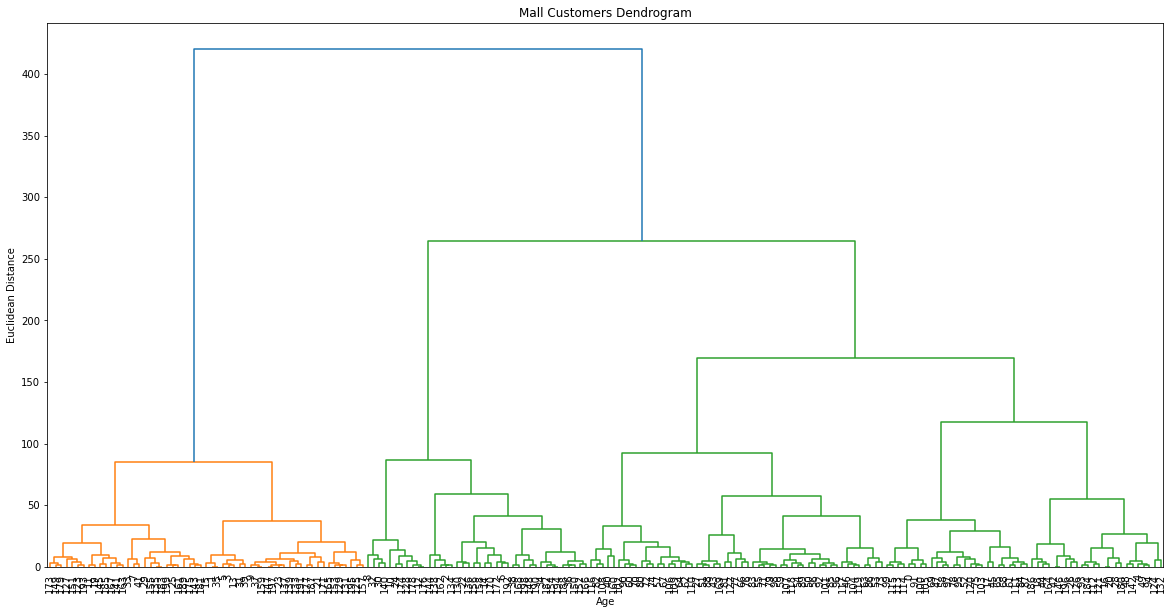

In [30]:
dendogram(age, 'Age')

In [31]:
cluster2 = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_predict = cluster2.fit_predict(age)
cluster_labels = cluster2.labels_
agglo_silhouette = silhouette_score(age, cluster_labels)
agglo_silhouette

0.40374071753059787

In [32]:
results_wpca.append(agglo_silhouette)
names.append("Agglomerative")

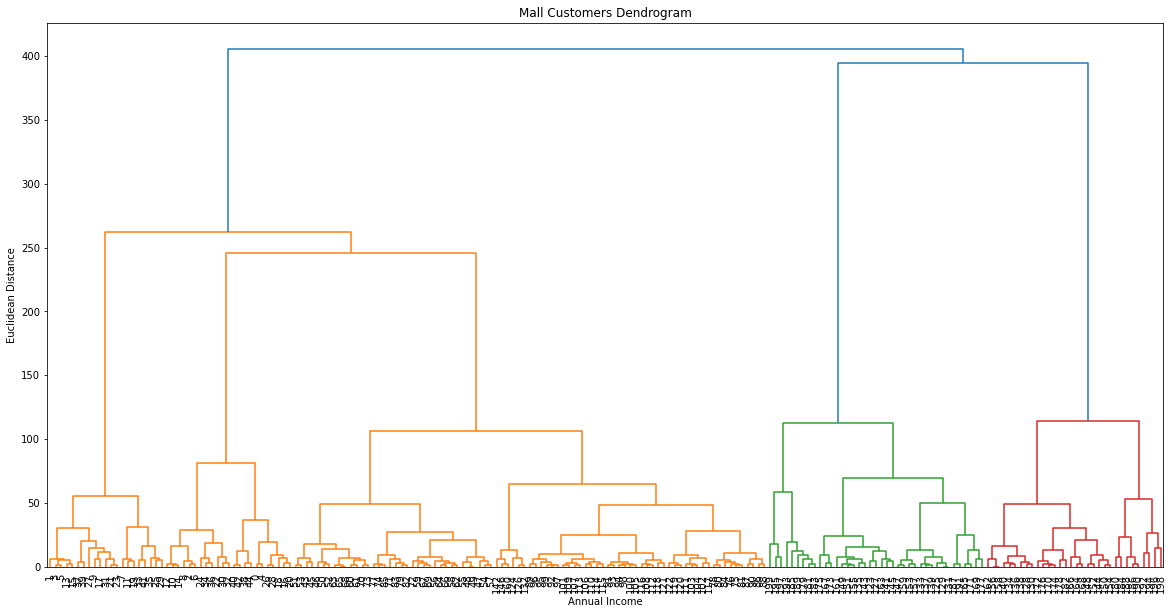

In [33]:
dendogram(income, 'Annual Income')

In [34]:
cluster3 = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
y_predict = cluster3.fit_predict(age)
cluster_labels1 = cluster3.labels_
Income_Agglo_silhouette = silhouette_score(age, cluster_labels1)
Income_Agglo_silhouette

0.4125958704145705

#### DBSCAN

In [35]:
neig = NearestNeighbors(n_neighbors = 5)
nbr = neig.fit(age)
distances, indices = nbr.kneighbors(age)

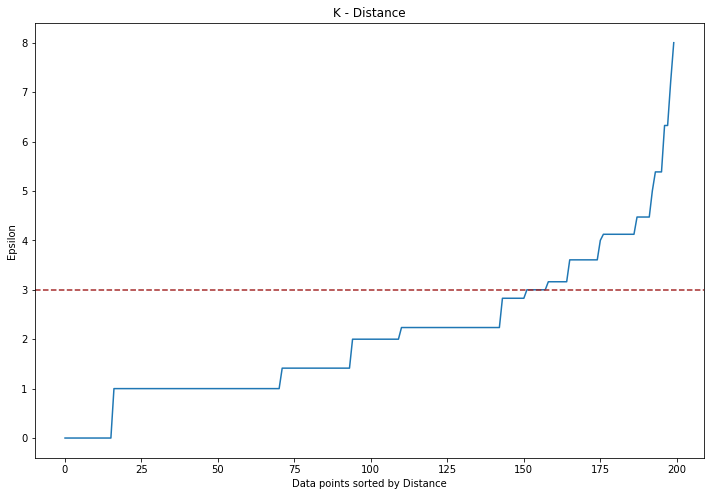

In [36]:
# Plotting the K-Distance Graph

distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.figure(figsize = (12,8))
plt.plot(distances)
plt.axhline(y = 3, color = 'brown', linestyle = '--')
plt.title('K - Distance')
plt.xlabel('Data points sorted by Distance')
plt.ylabel("Epsilon");

In [37]:
eps = 3
for min_samples in range(2,20,2):
    cluster4 = DBSCAN(eps = eps, min_samples = min_samples)
    cluster_labels = cluster4.fit_predict(age)
    
    x = cluster_labels + 2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]))
    print('eps =',eps,'| min_samples =', min_samples, '| obtained clustering :', results)

eps = 3 | min_samples = 2 | obtained clustering : [(1, 42), (2, 2), (3, 8), (4, 3), (5, 5), (6, 2), (7, 2), (8, 10), (9, 2), (10, 4), (11, 2), (12, 2), (13, 2), (14, 2), (15, 9), (16, 5), (17, 4), (18, 5), (19, 2), (20, 2), (21, 2), (22, 4), (23, 3), (24, 16), (25, 7), (26, 3), (27, 6), (28, 2), (29, 2), (30, 5), (31, 2), (32, 4), (33, 4), (34, 2), (35, 6), (36, 2), (37, 4), (38, 3), (39, 2), (40, 2), (41, 2), (42, 2)]
eps = 3 | min_samples = 4 | obtained clustering : [(1, 103), (2, 7), (3, 5), (4, 10), (5, 4), (6, 4), (7, 14), (8, 5), (9, 7), (10, 4), (11, 4), (12, 4), (13, 4), (14, 4), (15, 9), (16, 4), (17, 4), (18, 4)]
eps = 3 | min_samples = 6 | obtained clustering : [(1, 170), (2, 10), (3, 6), (4, 8), (5, 6)]
eps = 3 | min_samples = 8 | obtained clustering : [(1, 191), (2, 9)]
eps = 3 | min_samples = 10 | obtained clustering : [(1, 200)]
eps = 3 | min_samples = 12 | obtained clustering : [(1, 200)]
eps = 3 | min_samples = 14 | obtained clustering : [(1, 200)]
eps = 3 | min_sample

In [38]:
dbscan_opt = DBSCAN(eps = 3, min_samples = 6)
dbscan_opt.fit(age)

DBSCAN(eps=3, min_samples=6)

In [39]:
df['DBSCAN_opt_labels'] = dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

-1    170
 0     10
 2      8
 1      6
 3      6
Name: DBSCAN_opt_labels, dtype: int64

In [40]:
df['DBSCAN_opt_labels']

0     -1
1      1
2     -1
3      1
4     -1
      ..
195   -1
196   -1
197    0
198   -1
199    3
Name: DBSCAN_opt_labels, Length: 200, dtype: int64

In [41]:
DBSCAN_silhouette = metrics.silhouette_score(age, df['DBSCAN_opt_labels'])
DBSCAN_silhouette

-0.2830824702199763

In [42]:
results_wpca.append(DBSCAN_silhouette)
names.append('DBSCAN')

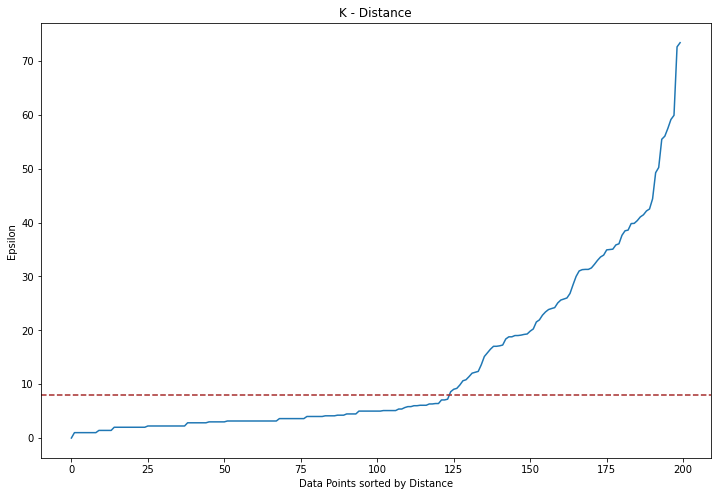

In [43]:
# DBSCAN for Income

neig = NearestNeighbors(n_neighbors = 5)
nbr = neig.fit(age)
distances, indices = nbr.kneighbors(income)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.figure(figsize = (12,8))
plt.plot(distances)
plt.axhline(y = 8, color = 'brown', linestyle = '--')
plt.title("K - Distance")
plt.xlabel("Data Points sorted by Distance")
plt.ylabel("Epsilon")
plt.show()

In [44]:
eps = 8
for min_samples in range(2,20,2):
    cluster5 = DBSCAN(eps = eps, min_samples = min_samples)
    cluster_labels = cluster5.fit_predict(income)
    
    x = cluster_labels + 2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii, y[ii]))
    print('eps =', eps, '| min_samples =', min_samples, '| obtained clustering :', results)

eps = 8 | min_samples = 2 | obtained clustering : [(1, 8), (2, 7), (3, 17), (4, 9), (5, 3), (6, 3), (7, 89), (8, 32), (9, 26), (10, 2), (11, 2), (12, 2)]
eps = 8 | min_samples = 4 | obtained clustering : [(1, 22), (2, 16), (3, 8), (4, 7), (5, 89), (6, 32), (7, 23), (8, 3)]
eps = 8 | min_samples = 6 | obtained clustering : [(1, 47), (2, 10), (3, 6), (4, 88), (5, 26), (6, 23)]
eps = 8 | min_samples = 8 | obtained clustering : [(1, 71), (2, 10), (3, 83), (4, 24), (5, 12)]
eps = 8 | min_samples = 10 | obtained clustering : [(1, 85), (2, 83), (3, 12), (4, 10), (5, 10)]
eps = 8 | min_samples = 12 | obtained clustering : [(1, 119), (2, 81)]
eps = 8 | min_samples = 14 | obtained clustering : [(1, 121), (2, 79)]
eps = 8 | min_samples = 16 | obtained clustering : [(1, 123), (2, 77)]
eps = 8 | min_samples = 18 | obtained clustering : [(1, 123), (2, 77)]


In [45]:
dbscan_opt = DBSCAN(eps = 8, min_samples = 8)
dbscan_opt.fit(income)

DBSCAN(eps=8, min_samples=8)

In [46]:
df['DBSCAN_opt_labels1'] = dbscan_opt.labels_
df['DBSCAN_opt_labels1'].value_counts()

 1    83
-1    71
 2    24
 3    12
 0    10
Name: DBSCAN_opt_labels1, dtype: int64

In [47]:
Income_dbscan_silhouette = metrics.silhouette_score(income, df['DBSCAN_opt_labels1'])
Income_dbscan_silhouette

0.23130655888279378

In [48]:
print("silhouette_score for K-Means Age and spending scores : ",kmeans_score)
print("silhouette_score for K-Means Income and spending scores : ",kmeans_income_score)
print("silhouette_score for Agglomerative Age and spending scores : ",agglo_silhouette)
print("silhouette_score for K-Agglomerative Income and spending scores : ",Income_Agglo_silhouette)
print("silhouette_score for DBSCAN Age and spending scores : ",DBSCAN_silhouette)
print("silhouette_score for DBSCAN Income and spending scores : ",Income_dbscan_silhouette)

silhouette_score for K-Means Age and spending scores :  0.446619017091555
silhouette_score for K-Means Income and spending scores :  0.53976103063432
silhouette_score for Agglomerative Age and spending scores :  0.40374071753059787
silhouette_score for K-Agglomerative Income and spending scores :  0.4125958704145705
silhouette_score for DBSCAN Age and spending scores :  -0.2830824702199763
silhouette_score for DBSCAN Income and spending scores :  0.23130655888279378


#### conclusion :
    * Imported all the libraries
    * Read the data and did data preparation also plotted the graphs accordingly
    * Then done Label Encoder
    * and then found silhouette_score for Kmeans clustering, Agglomerative and DBSCAN for both Age and Income and plotted the graphs accordingly